# US-Ignite Fed_Notebook

# Data from 2009-2016

In [3]:
#import libraries from Carto.
from cartoframes.auth import set_default_credentials
from cartoframes.viz import Map, Layer
import cartoframes
cartoframes.__version__
#from cartoframes.viz.helpers import color_continuous_layer
import pandas as pd
import geopandas as gpd
import requests
import json
from autocensus import Query #Library from Socrata to gather ACS Data
from cartoframes.data.services import Geocoding
#import censusdata
#set_default_credentials('creds_usignite.json')
set_default_credentials(
    base_url='https://usignite-admin.carto.com/',
    api_key='81c922dc336bd82103d92a768816a4567c444909'
)

from cartoframes.data.observatory import Catalog, Variable, Geography, Dataset

In [4]:
import numpy as np

from linearmodels import PanelOLS
from linearmodels import RandomEffects
import ipywidgets as widgets
from ipywidgets import Output, Tab
from IPython.display import clear_output
from cartoframes.data.services import Isolines
from cartoframes.data.observatory import Variable
from cartoframes.data.observatory import Enrichment
from cartoframes.data.observatory import Catalog

# EDA

In [5]:
import seaborn as sns

In [6]:
df_final=pd.read_csv("~/Downloads/Final_merged.csv")

In [9]:
data=df_final[['zipcode', 'geoid', 'NAICS2012', 'year', 'edut',
       'collegemale', 'collegefemale','pop',
       'households', 'income', 'gini', 'total_p', 'ratio_65', 'Empratio',
       'estabratio']]

In [34]:
data['total_college']=data['collegemale']+data['collegefemale']
data['college_ratio']=data['total_college']/data['edut']

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
data['Empratio'][data['Empratio']!=0.0].sort_values()

576         0.023095
580         0.023095
1018        0.039139
1019        0.039139
1017        0.039139
6486        0.045767
578         0.046189
579         0.046189
1020        0.048924
1021        0.058708
5168        0.063559
4470        0.068729
4463        0.068729
577         0.069284
3812        0.070093
6345        0.073692
6344        0.073692
2287        0.077280
3810        0.077882
3813        0.077882
702         0.078221
5080        0.078740
5079        0.078740
5315        0.079051
5245        0.079051
703         0.082338
2655        0.086372
5169        0.091808
6346        0.092115
2286        0.092736
            ...     
2416    15301.290323
2415    16112.903226
3885    16758.163582
3886    16955.026134
4803    19186.010638
1660    19725.514970
4802    19823.457447
5936    20043.509400
1659    20156.703593
6146    20886.247191
6147    21960.801498
1239    21961.359192
2478    22265.770210
2479    22353.997454
1240    22814.227510
5937    24125.765443
5607    25786

In [36]:
data['Empratio'].describe() 

count     6503.000000
mean       509.209210
std       2405.904520
min          0.000000
25%          1.934000
50%         15.635593
75%        121.286881
max      54823.400890
Name: Empratio, dtype: float64

In [37]:
data['Empratio'].sort_values()

2075        0.000000
2063        0.000000
2062        0.000000
4837        0.000000
4836        0.000000
4835        0.000000
4834        0.000000
4833        0.000000
4832        0.000000
4831        0.000000
4830        0.000000
3073        0.000000
3074        0.000000
3075        0.000000
3076        0.000000
3077        0.000000
3078        0.000000
3079        0.000000
3080        0.000000
3081        0.000000
3082        0.000000
3083        0.000000
3084        0.000000
3085        0.000000
3086        0.000000
2061        0.000000
2064        0.000000
5304        0.000000
5303        0.000000
4838        0.000000
            ...     
2416    15301.290323
2415    16112.903226
3885    16758.163582
3886    16955.026134
4803    19186.010638
1660    19725.514970
4802    19823.457447
5936    20043.509400
1659    20156.703593
6146    20886.247191
6147    21960.801498
1239    21961.359192
2478    22265.770210
2479    22353.997454
1240    22814.227510
5937    24125.765443
5607    25786

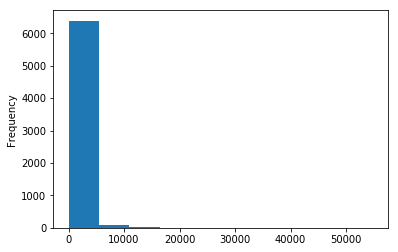

In [38]:
data['Empratio'].plot(kind ="hist")

In [39]:
data['estabratio'].describe() 

count    6503.000000
mean       24.396626
std        96.848530
min         0.000000
25%         0.124813
50%         0.822669
75%         5.582492
max      1737.422130
Name: estabratio, dtype: float64

In [40]:
data['logesration']=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


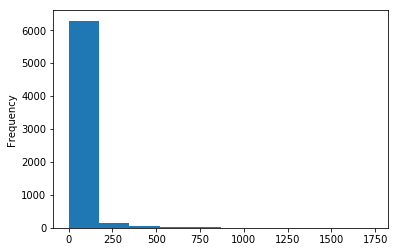

In [41]:
data['estabratio'].plot(kind ="hist")

In [42]:
loges=np.log(data['estabratio'])

/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [43]:
data['gini'].describe() 

count    6456.000000
mean        0.409267
std         0.061032
min         0.012800
25%         0.369700
50%         0.405350
75%         0.446000
max         0.722600
Name: gini, dtype: float64

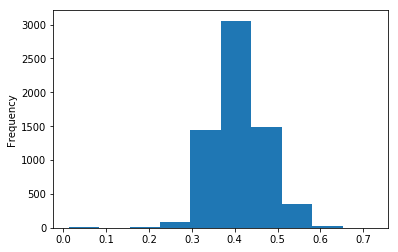

In [44]:
data['gini'].plot(kind ="hist") 

In [45]:
corr=data.corr().abs()

#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


In [46]:
corr

,zipcode,geoid,NAICS2012,year,edut,collegemale,collegefemale,pop,households,income,gini,total_p,ratio_65,Empratio,estabratio,total_college,college_ratio,logesration
zipcode,1.000000,0.335203,NaN,0.000000e+00,0.046236,0.092548,0.058723,0.063170,0.020399,0.031919,0.017846,1.671289e-02,8.460610e-02,0.044774,0.030280,0.076860,0.199519,0.022670
geoid,0.335203,1.000000,NaN,0.000000e+00,0.191040,0.053658,0.103691,0.195284,0.194871,0.114744,0.020321,1.781014e-01,1.475467e-01,0.013405,0.001662,0.081368,0.070971,0.037082
NAICS2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.000000,0.000000,NaN,1.000000e+00,0.073637,0.076292,0.059178,0.079752,0.114599,0.029948,0.094464,4.436874e-18,2.085290e-18,0.239822,0.292956,0.069050,0.030316,0.552417
edut,0.046236,0.191040,NaN,7.363734e-02,1.000000,0.738114,0.774093,0.586559,0.653314,0.935323,0.000295,8.588436e-01,6.987764e-02,0.015683,0.018102,0.774570,0.145381,0.025287
collegemale,0.092548,0.053658,NaN,7.629217e-02,0.738114,1.000000,0.908629,0.267166,0.564542,0.771680,0.132760,5.300678e-01,5.316463e-02,0.051811,0.049001,0.975343,0.674583,0.074318
collegefemale,0.058723,0.103691,NaN,5.917772e-02,0.774093,0.908629,1.000000,0.315878,0.584577,0.785941,0.085744,5.882471e-01,5.855776e-02,0.047035,0.042946,0.978388,0.641231,0.064750
pop,0.063170,0.195284,NaN,7.975208e-02,0.586559,0.267166,0.315878,1.000000,0.562371,0.535116,0.111239,8.216351e-01,2.082188e-01,0.018401,0.023950,0.299233,0.068626,0.097090
households,0.020399,0.194871,NaN,1.145992e-01,0.653314,0.564542,0.584577,0.562371,1.000000,0.688863,0.132798,5.493846e-01,5.839033e-02,0.030713,0.034779,0.588501,0.269858,0.018388
income,0.031919,0.114744,NaN,2.994845e-02,0.935323,0.771680,0.785941,0.535116,0.688863,1.000000,0.093203,8.440757e-01,4.870403e-02,0.050894,0.060025,0.797452,0.248997,0.097855


[Text(0.5, 0, 'zipcode'),
 Text(1.5, 0, 'geoid'),
 Text(2.5, 0, 'NAICS2012'),
 Text(3.5, 0, 'year'),
 Text(4.5, 0, 'edut'),
 Text(5.5, 0, 'collegemale'),
 Text(6.5, 0, 'collegefemale'),
 Text(7.5, 0, 'pop'),
 Text(8.5, 0, 'households'),
 Text(9.5, 0, 'income'),
 Text(10.5, 0, 'gini'),
 Text(11.5, 0, 'total_p'),
 Text(12.5, 0, 'ratio_65'),
 Text(13.5, 0, 'Empratio'),
 Text(14.5, 0, 'estabratio'),
 Text(15.5, 0, 'total_college'),
 Text(16.5, 0, 'college_ratio'),
 Text(17.5, 0, 'logesration')]

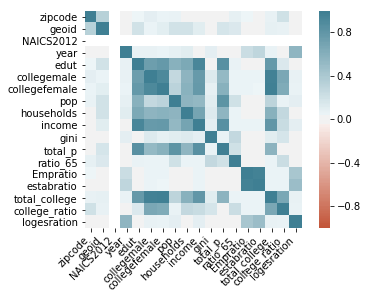

In [47]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [56]:
df=data

In [57]:
df.columns

Index(['zipcode', 'geoid', 'NAICS2012', 'year', 'edut', 'collegemale',
       'collegefemale', 'pop', 'households', 'income', 'gini', 'total_p',
       'ratio_65', 'Empratio', 'estabratio', 'total_college', 'college_ratio',
       'logesration'],
      dtype='object')

In [58]:
df.head()

,zipcode,geoid,NAICS2012,year,edut,collegemale,collegefemale,pop,households,income,gini,total_p,ratio_65,Empratio,estabratio,total_college,college_ratio,logesration
0,91901,6073015502,0,2010,1651.0,130.0,107.0,208.0,83.0,864.0,0.4400,2748,0.108806,39.686888,2.360078,237.0,0.143549,0.858695
1,91901,6073015502,0,2011,1717.0,124.0,114.0,234.0,95.0,896.0,0.4080,2748,0.108806,41.095890,2.383562,238.0,0.138614,0.868596
2,91901,6073015502,0,2012,1790.0,124.0,107.0,291.0,113.0,904.0,0.3790,2748,0.108806,0.293542,0.029354,231.0,0.129050,-3.528319
3,91901,6073015502,0,2013,1900.0,141.0,148.0,365.0,136.0,903.0,0.3782,2748,0.108806,0.176125,0.017613,289.0,0.152105,-4.039145
4,91901,6073015502,0,2014,1865.0,143.0,135.0,411.0,154.0,883.0,0.3837,2748,0.108806,0.234834,0.023483,278.0,0.149062,-3.751463


In [59]:
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

In [60]:
df['year'] = pd.to_datetime(df['year'], format='%Y')


/Users/jiaqitang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
#add column year to index
df=df.set_index('year', append=True)
#swap indexes




In [62]:
import statsmodels.formula.api as smf

In [63]:
df.columns

Index(['zipcode', 'geoid', 'NAICS2012', 'edut', 'collegemale', 'collegefemale',
       'pop', 'households', 'income', 'gini', 'total_p', 'ratio_65',
       'Empratio', 'estabratio', 'total_college', 'college_ratio',
       'logesration'],
      dtype='object')

In [67]:
FE_ols = smf.ols(formula= 'estabratio ~ 1 +pop+households+income+ratio_65+edut', data = df).fit()
print(FE_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             estabratio   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     22.75
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           1.07e-22
Time:                        14:52:58   Log-Likelihood:                -38777.
No. Observations:                6479   AIC:                         7.757e+04
Df Residuals:                    6473   BIC:                         7.761e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0462      4.350      5.068      0.0

In [69]:
import numpy as np
import pandas as pd
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl